In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Load the dataset from the specified file path
# This loads the training data into a DataFrame for further analysis
df = pd.read_csv(r'C:\Users\pattn\Downloads\Train.csv')

# Display the first few rows of the dataset to understand its structure
# This gives an overview of the data, including the column names and first entries
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Load the dataset from the specified file path
# This loads the training data into a DataFrame for further analysis
df_cleaned = pd.read_csv(r'C:\Users\pattn\Downloads\clean_train_V1.csv')

# Display the first few rows of the dataset to understand its structure
# This gives an overview of the data, including the column names and first entries
df_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.057792,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.057792,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_cleaned.shape

(8523, 12)

In [5]:
# Feature Engineering: Creating new features to capture more information

# Calculate the age of the outlet by subtracting the establishment year from the current year
df_cleaned['Outlet_Age'] = 2024 - df['Outlet_Establishment_Year']

# Create a combined feature for 'Outlet_Type' and 'Outlet_Location_Type'
# This captures the relationship between the type and location of each outlet
df_cleaned['Outlet_Type_Location'] = df_cleaned['Outlet_Type'].astype(str) + '_' + df_cleaned['Outlet_Location_Type'].astype(str)

# Create a combined feature for 'Item_Type' and 'Outlet_Type'
# This feature captures interactions between item types and outlet types
df_cleaned['Item_Outlet_Type'] = df_cleaned['Item_Type'].astype(str) + '_' + df_cleaned['Outlet_Type'].astype(str)

# Create a combined feature for 'Item_Fat_Content' and 'Item_Type'
# This feature captures the relationship between fat content and item type
df_cleaned['FatContent_ItemType'] = df_cleaned['Item_Fat_Content'].astype(str) + '_' + df_cleaned['Item_Type'].astype(str)

# Calculate the product of 'Item_Visibility' and 'Item_MRP'
# This feature highlights any influence of visibility and pricing on sales
df_cleaned['Visibility_MRP'] = df_cleaned['Item_Visibility'] * df_cleaned['Item_MRP']

# Create a combined feature for 'Item_Type' and 'Outlet_Location_Type'
# This captures interactions between item types and outlet location types
df_cleaned['Item_Location_Type'] = df_cleaned['Item_Type'].astype(str) + '_' + df_cleaned['Outlet_Location_Type'].astype(str)



In [6]:
df_cleaned.shape

(8523, 18)

In [7]:
df_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Outlet_Type_Location,Item_Outlet_Type,FatContent_ItemType,Visibility_MRP,Item_Location_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25,Supermarket Type1_Tier 1,Dairy_Supermarket Type1,Low Fat_Dairy,4.008763,Dairy_Tier 1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15,Supermarket Type2_Tier 3,Soft Drinks_Supermarket Type2,Regular_Soft Drinks,0.930544,Soft Drinks_Tier 3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25,Supermarket Type1_Tier 1,Meat_Supermarket Type1,Low Fat_Meat,2.373528,Meat_Tier 1
3,FDX07,19.20,Regular,0.057792,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,26,Grocery Store_Tier 3,Fruits and Vegetables_Grocery Store,Regular_Fruits and Vegetables,10.523697,Fruits and Vegetables_Tier 3
4,NCD19,8.93,Low Fat,0.057792,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37,Supermarket Type1_Tier 3,Household_Supermarket Type1,Low Fat_Household,3.112777,Household_Tier 3


In [8]:
# Separate target variable
x = df_cleaned.drop(columns=['Item_Outlet_Sales'])
y = df_cleaned['Item_Outlet_Sales']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [9]:
print("x_train")
x_train.shape


x_train


(6818, 17)

In [10]:
print("x_test")
x_test.shape

x_test


(1705, 17)

In [11]:
print("y_train")
y_train.shape

y_train


(6818,)

In [12]:
print("y_test")
y_test.shape

y_test


(1705,)

In [13]:
x_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Outlet_Type_Location,Item_Outlet_Type,FatContent_ItemType,Visibility_MRP,Item_Location_Type
549,FDW44,9.500,Regular,0.035206,Fruits and Vegetables,171.3448,OUT049,1999,Medium,Tier 1,Supermarket Type1,25,Supermarket Type1_Tier 1,Fruits and Vegetables_Supermarket Type1,Regular_Fruits and Vegetables,6.032342,Fruits and Vegetables_Tier 1
7757,NCF54,18.000,Low Fat,0.047473,Household,170.5422,OUT045,2002,Small,Tier 2,Supermarket Type1,22,Supermarket Type1_Tier 2,Household_Supermarket Type1,Low Fat_Household,8.096173,Household_Tier 2
764,FDY03,17.600,Regular,0.076122,Meat,111.7202,OUT046,1997,Small,Tier 1,Supermarket Type1,27,Supermarket Type1_Tier 1,Meat_Supermarket Type1,Regular_Meat,8.504346,Meat_Tier 1
6867,FDQ20,8.325,Low Fat,0.029845,Fruits and Vegetables,41.6138,OUT045,2002,Small,Tier 2,Supermarket Type1,22,Supermarket Type1_Tier 2,Fruits and Vegetables_Supermarket Type1,Low Fat_Fruits and Vegetables,1.241974,Fruits and Vegetables_Tier 2
2716,FDP34,12.850,Low Fat,0.137228,Snack Foods,155.5630,OUT046,1997,Small,Tier 1,Supermarket Type1,27,Supermarket Type1_Tier 1,Snack Foods_Supermarket Type1,Low Fat_Snack Foods,21.347576,Snack Foods_Tier 1


In [14]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 549 to 7270
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                6818 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                6818 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
 11  Outlet_Age                 6818 non-null   int64  
 12  Outlet_Type_Location       6818 non-null   object 
 13  Item_Outlet_Type           6818 non-null   object 


In [15]:
x_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Outlet_Age                   0
Outlet_Type_Location         0
Item_Outlet_Type             0
FatContent_ItemType          0
Visibility_MRP               0
Item_Location_Type           0
dtype: int64

In [16]:
# Make copies of X_train and X_test for encoding
x_train_encoded = x_train.copy()
x_test_encoded = x_test.copy()


In [17]:
# Import necessary libraries
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.model_selection import train_test_split

# Target Encoding for selected interaction features
# Using TargetEncoder to encode features based on their correlation with 'Item_Outlet_Sales'
target_encoder = ce.TargetEncoder(cols=['Outlet_Type_Location', 'Item_Outlet_Type', 'Item_Location_Type', 'FatContent_ItemType'])
x_train_encoded[['Outlet_Type_Location', 'Item_Outlet_Type', 'Item_Location_Type', 'FatContent_ItemType']] = target_encoder.fit_transform(
    x_train_encoded[['Outlet_Type_Location', 'Item_Outlet_Type', 'Item_Location_Type', 'FatContent_ItemType']], y_train
)
x_test_encoded[['Outlet_Type_Location', 'Item_Outlet_Type', 'Item_Location_Type', 'FatContent_ItemType']] = target_encoder.transform(
    x_test_encoded[['Outlet_Type_Location', 'Item_Outlet_Type', 'Item_Location_Type', 'FatContent_ItemType']]
)


# Frequency Encoding for 'Outlet_Type_Location' based on occurrence frequency
freq_outlet_type_location = x_train_encoded['Outlet_Type_Location'].value_counts()
x_train_encoded['Outlet_Type_Location'] = x_train_encoded['Outlet_Type_Location'].map(freq_outlet_type_location)
x_test_encoded['Outlet_Type_Location'] = x_test_encoded['Outlet_Type_Location'].map(freq_outlet_type_location)


# Target Encoding for high-cardinality identifiers
# Encoding 'Item_Identifier' and 'Outlet_Identifier' based on their mean target values
target_encoder_id = ce.TargetEncoder(cols=['Item_Identifier', 'Outlet_Identifier'])
x_train_encoded[['Item_Identifier', 'Outlet_Identifier']] = target_encoder_id.fit_transform(
    x_train_encoded[['Item_Identifier', 'Outlet_Identifier']], y_train
)
x_test_encoded[['Item_Identifier', 'Outlet_Identifier']] = target_encoder_id.transform(
    x_test_encoded[['Item_Identifier', 'Outlet_Identifier']]
)


# Leave-One-Out Encoding for features with moderate correlation
loo_encoder = ce.LeaveOneOutEncoder(cols=['Item_Type'])
x_train_encoded['Item_Type'] = loo_encoder.fit_transform(x_train_encoded['Item_Type'], y_train)
x_test_encoded['Item_Type'] = loo_encoder.transform(x_test_encoded['Item_Type'])

loo_encoder_outlet = ce.LeaveOneOutEncoder(cols=['Outlet_Type'])
x_train_encoded['Outlet_Type'] = loo_encoder_outlet.fit_transform(x_train_encoded['Outlet_Type'], y_train)
x_test_encoded['Outlet_Type'] = loo_encoder_outlet.transform(x_test_encoded['Outlet_Type'])

# Ordinal Encoding for ordered features
ordinal_features = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']
encoder = OrdinalEncoder(categories=[
    ['Low fat', 'Regular'],               # Item_Fat_Content hierarchy
    ['Small', 'Medium', 'High'],          # Outlet_Size hierarchy
    ['Tier 3', 'Tier 2', 'Tier 1']        # Outlet_Location_Type hierarchy
], handle_unknown='use_encoded_value', unknown_value=-1)

x_train_encoded[ordinal_features] = encoder.fit_transform(x_train_encoded[ordinal_features])
x_test_encoded[ordinal_features] = encoder.transform(x_test_encoded[ordinal_features])

# Display the resulting DataFrame after all encoding transformations
print("Training DataFrame after encoding transformations:")
print(x_train_encoded.head())

print("\nTest DataFrame after encoding transformations:")
print(x_test_encoded.head())


Training DataFrame after encoding transformations:
      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
549       2127.765900        9.500               1.0         0.035206   
7757      2201.622341       18.000              -1.0         0.047473   
764       1996.716148       17.600               1.0         0.076122   
6867      1940.191294        8.325              -1.0         0.029845   
2716      2283.658565       12.850              -1.0         0.137228   

        Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
549   2282.658718  171.3448        2374.382433                       1999   
7757  2234.507241  170.5422        2214.931153                       2002   
764   2166.373464  111.7202        2275.133586                       1997   
6867  2284.758548   41.6138        2214.931153                       2002   
2716  2262.331429  155.5630        2275.133586                       1997   

      Outlet_Size  Outlet_Location_Type  Outlet

In [18]:
print(x_train_encoded.shape)
x_train_encoded.dtypes

(6818, 17)


Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Outlet_Age                     int64
Outlet_Type_Location           int64
Item_Outlet_Type             float64
FatContent_ItemType          float64
Visibility_MRP               float64
Item_Location_Type           float64
dtype: object

In [19]:
print(x_test_encoded.shape)
x_test_encoded.dtypes

(1705, 17)


Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Outlet_Age                     int64
Outlet_Type_Location           int64
Item_Outlet_Type             float64
FatContent_ItemType          float64
Visibility_MRP               float64
Item_Location_Type           float64
dtype: object

In [20]:
from sklearn.preprocessing import StandardScaler

# Define numerical features
numerical_features = ['Item_Weight', 'Outlet_Establishment_Year', 'Item_Visibility', 'Item_MRP']

# Calculate Outlet Age as a derived feature from the year
x_train_encoded['Outlet_Age'] = 2024 - x_train_encoded['Outlet_Establishment_Year']
x_test_encoded['Outlet_Age'] = 2024 - x_test_encoded['Outlet_Establishment_Year']

# Update numerical features to include Outlet_Age (after dropping the original Outlet_Establishment_Year)
numerical_features = ['Item_Weight', 'Outlet_Age', 'Item_Visibility', 'Item_MRP']
x_train_encoded.drop(columns=['Outlet_Establishment_Year'], inplace=True)
x_test_encoded.drop(columns=['Outlet_Establishment_Year'], inplace=True)

# Standardize the numerical features
scaler = StandardScaler()
x_train_encoded[numerical_features] = scaler.fit_transform(x_train_encoded[numerical_features])
x_test_encoded[numerical_features] = scaler.transform(x_test_encoded[numerical_features])

# Display the resulting DataFrames
print("Training DataFrame after standardizing numerical features:")
print(x_train_encoded[numerical_features].head())

print("\nTest DataFrame after standardizing numerical features:")
print(x_test_encoded[numerical_features].head())


Training DataFrame after standardizing numerical features:
      Item_Weight  Outlet_Age  Item_Visibility  Item_MRP
549     -0.787762   -0.136169        -0.739879  0.470709
7757     1.216712   -0.493521        -0.469173  0.457877
764      1.122384    0.102066         0.163026 -0.482625
6867    -1.064851   -0.493521        -0.858173 -1.603553
2716     0.002236    0.102066         1.511471  0.218375

Test DataFrame after standardizing numerical features:
      Item_Weight  Outlet_Age  Item_Visibility  Item_MRP
7503     0.344176    1.293240        -0.936412 -0.998908
2957    -1.158000    0.102066         0.052999 -1.586048
7031     0.391340   -0.136169        -0.605107 -1.596652
1084    -0.245375    1.531475        -0.528890  0.508453
856     -0.623867   -0.731756        -1.241912  0.889079


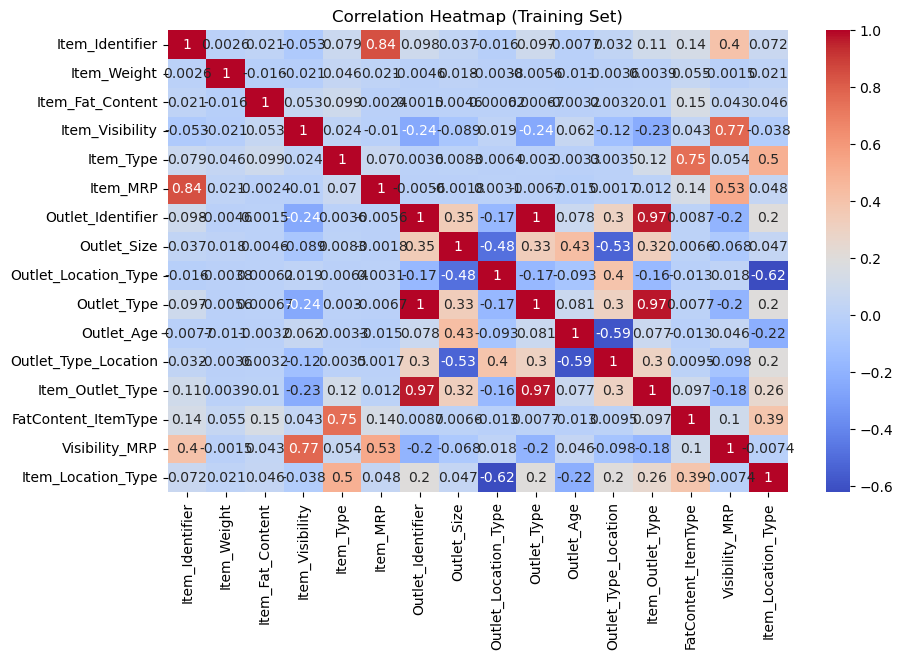

In [21]:
# Select only numerical columns from the encoded training data
numeric_cols = x_train_encoded.select_dtypes(include=['int64', 'float64']).columns

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(x_train_encoded[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Training Set)')
plt.show()


In [22]:
# Store results in a dictionary
results = {}

# Check relationships for each numeric feature in the training set
for col in numeric_cols:
    # Calculate Pearson correlation for linearity
    pearson_corr, _ = pearsonr(x_train_encoded[col].dropna(), y_train.dropna())
    
    # Calculate Spearman correlation for monotonic (non-linear) relationships
    spearman_corr, _ = spearmanr(x_train_encoded[col].dropna(), y_train.dropna())

    # Fit a simple linear regression
    X = x_train_encoded[[col]].dropna()
    y = y_train.loc[X.index]  # Ensure alignment with non-null indices
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    linear_r2 = linear_model.score(X, y)

    # Fit a polynomial regression of degree 2 (quadratic)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    poly_r2 = poly_model.score(X_poly, y)
    
    # Save results for comparison
    results[col] = {
        'Pearson Correlation': pearson_corr,
        'Spearman Correlation': spearman_corr,
        'Linear R-squared': linear_r2,
        'Quadratic R-squared': poly_r2,
    }

# Display results
results_df = pd.DataFrame(results).T
results_df


,Pearson Correlation,Spearman Correlation,Linear R-squared,Quadratic R-squared
Item_Identifier,0.678106,0.663132,0.459828,0.459854
Item_Weight,0.004088,0.003323,0.000017,0.001032
Item_Fat_Content,0.014075,0.010987,0.000198,0.000198
Item_Visibility,-0.132507,-0.131629,0.017558,0.022389
Item_Type,0.034171,-0.044325,0.001168,0.001513
Item_MRP,0.572599,0.561784,0.327870,0.328525
Outlet_Identifier,0.490494,0.436723,0.240584,0.240584
Outlet_Size,0.169985,0.213503,0.028895,0.048441
Outlet_Location_Type,-0.084199,-0.065478,0.007090,0.012103
Outlet_Type,0.488419,0.019124,0.238553,0.238554


In [23]:
from sklearn.feature_selection import mutual_info_regression

# Calculate the mutual information scores between each feature in X_train_encoded and the target variable y_train
mi = mutual_info_regression(x_train_encoded, y_train)

# Create a pandas Series to hold the mutual information scores with feature names as the index
mi_scores = pd.Series(mi, index=x_train_encoded.columns)

# Sort the mutual information scores in descending order to identify the most informative features
mi_scores = mi_scores.sort_values(ascending=False)

# Print the mutual information scores to understand the relationship between features and the target variable
print("Mutual Information Scores:\n", mi_scores)


Mutual Information Scores:
 Outlet_Type             1.887301
Item_Type               1.778411
Item_MRP                0.693903
Item_Identifier         0.408315
Item_Outlet_Type        0.282478
Outlet_Type_Location    0.261247
Outlet_Identifier       0.246135
Outlet_Age              0.150504
Visibility_MRP          0.089038
Item_Visibility         0.082189
FatContent_ItemType     0.049403
Item_Location_Type      0.049263
Outlet_Location_Type    0.038943
Item_Weight             0.035675
Outlet_Size             0.033269
Item_Fat_Content        0.016977
dtype: float64


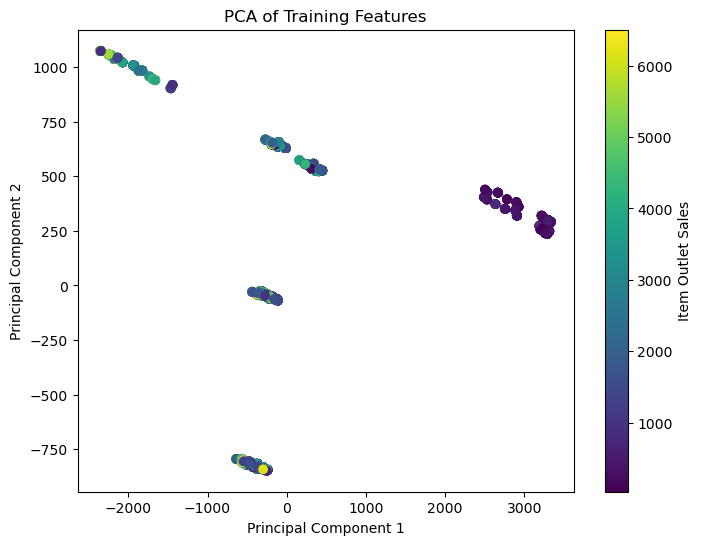

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Instantiate the PCA object, specifying the number of components to reduce to
pca = PCA(n_components=2)

# Fit the PCA model to the training feature set and transform the data into principal components
X_train_pca = pca.fit_transform(x_train_encoded)

# Visualizing the PCA results
plt.figure(figsize=(8, 6))

# Create a scatter plot of the first two principal components
# Color the points based on the 'Item_Outlet_Sales' values in the training set
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')

# Add titles and labels to the plot
plt.title("PCA of Training Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Add a color bar to indicate the scale of 'Item Outlet Sales'
plt.colorbar(label='Item Outlet Sales')

# Display the plot
plt.show()


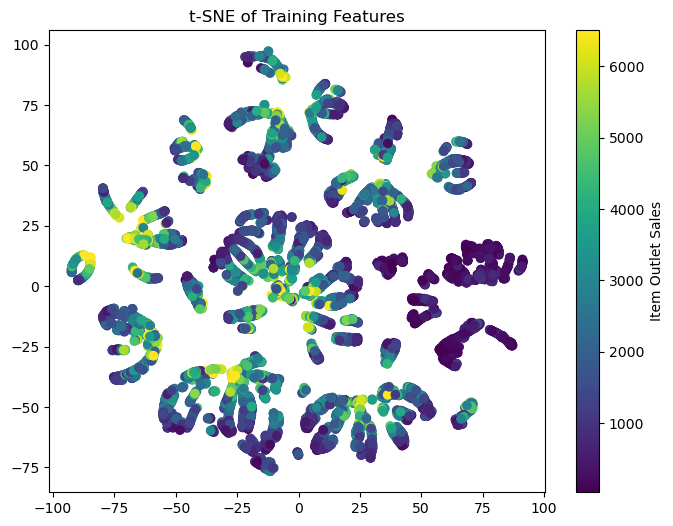

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Instantiate the t-SNE object, specifying the number of components to reduce to and a random seed for reproducibility
tsne = TSNE(n_components=2, random_state=42)

# Fit the t-SNE model to the training feature set and transform the data into two dimensions
X_train_tsne = tsne.fit_transform(x_train_encoded)

# Visualizing the t-SNE results
plt.figure(figsize=(8, 6))

# Create a scatter plot of the two t-SNE components
# Color the points based on the 'Item_Outlet_Sales' values in the training set
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')

# Add a title to the plot
plt.title("t-SNE of Training Features")

# Add a color bar to indicate the scale of 'Item Outlet Sales'
plt.colorbar(label='Item Outlet Sales')

# Display the plot
plt.show()


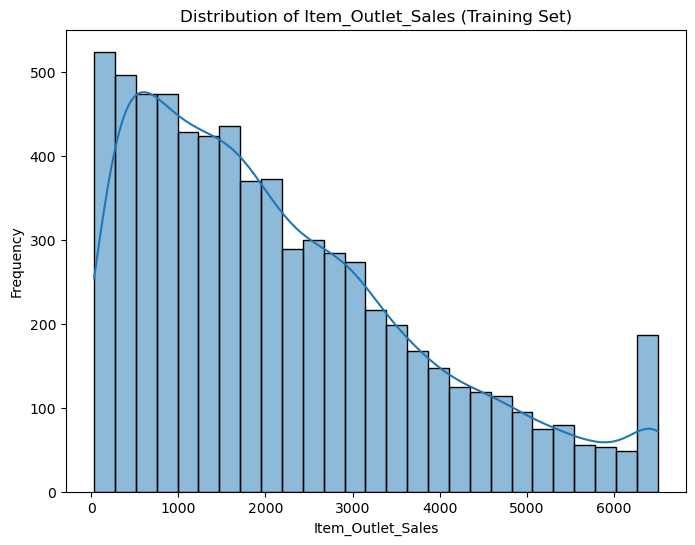

Skewness of Item_Outlet_Sales in Training Set: 0.8647529368863601


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target variable in the training set
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True)
plt.title("Distribution of Item_Outlet_Sales (Training Set)")
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Frequency")
plt.show()

# Calculating the skewness of Item_Outlet_Sales in the training set
print("Skewness of Item_Outlet_Sales in Training Set:", y_train.skew())


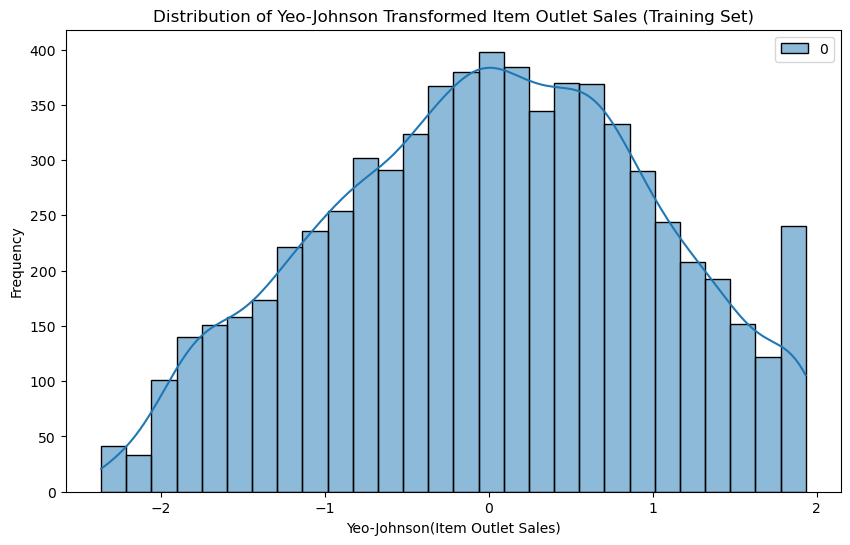

Skewness of Transformed Item_Outlet_Sales in Training Set: -0.09650322217896691


In [27]:
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate the PowerTransformer with Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

# Fit the transformer on the training target variable and transform y_train
y_train_transformed = pt.fit_transform(y_train.values.reshape(-1, 1))

# Transform y_test based on the training transformation
y_test_transformed = pt.transform(y_test.values.reshape(-1, 1))

# Plotting the distribution of the transformed training target variable
plt.figure(figsize=(10, 6))
sns.histplot(y_train_transformed, kde=True)
plt.title("Distribution of Yeo-Johnson Transformed Item Outlet Sales (Training Set)")
plt.xlabel("Yeo-Johnson(Item Outlet Sales)")
plt.ylabel("Frequency")
plt.show()

# Optional: Checking the skewness after transformation
print("Skewness of Transformed Item_Outlet_Sales in Training Set:", pd.Series(y_train_transformed.flatten()).skew())


In [30]:
x_train_encoded.shape

(6818, 16)

In [31]:
x_test_encoded.shape

(1705, 16)

In [32]:
y_train.shape

(6818,)

In [33]:
y_train_transformed

array([[ 0.3679784 ],
       [ 0.72339674],
       [-0.47450846],
       ...,
       [ 1.8281632 ],
       [-0.07524516],
       [-0.6189086 ]])

In [38]:
# Replace 'your_directory' with the desired path to save the file
Preprocessed_data_path = r'C:\Users\pattn\Downloads\preprocessed_data.csv'  # Update this path as needed

# Save the processed training and testing data to CSV files
processed_train_path = r'C:\Users\pattn\Downloads\processed_train_V2.csv'
processed_test_path = r'C:\Users\pattn\Downloads\processed_test_V2.csv'

# Save the training and test sets (encoded features and transformed target values)
x_train_encoded.to_csv(processed_train_path, index=False)
x_test_encoded.to_csv(processed_test_path, index=False)

# Optionally, save the target variables (transformed)
y_train_transformed_df = pd.DataFrame(y_train_transformed, columns=['Item_Outlet_Sales'])
y_test_transformed_df = pd.DataFrame(y_test_transformed, columns=['Item_Outlet_Sales'])

y_train_transformed_df.to_csv(r'C:\Users\pattn\Downloads\y_train_transformed.csv', index=False)
y_test_transformed_df.to_csv(r'C:\Users\pattn\Downloads\y_test_transformed.csv', index=False)

# Save the cleaned dataset (use df_cleaned here)
df_cleaned.to_csv(Preprocessed_data_path, index=False)

# Print confirmation message
print(f"Processed training data saved at {processed_train_path}")
print(f"Processed testing data saved at {processed_test_path}")
print("Transformed target variables saved at 'C:\\Users\\pattn\\Downloads\\y_train_transformed.csv' and 'C:\\Users\\pattn\\Downloads\\y_test_transformed.csv'")
print(f"Cleaned dataset saved at {Preprocessed_data_path}")


Processed training data saved at C:\Users\pattn\Downloads\processed_train_V2.csv
Processed testing data saved at C:\Users\pattn\Downloads\processed_test_V2.csv
Transformed target variables saved at 'C:\Users\pattn\Downloads\y_train_transformed.csv' and 'C:\Users\pattn\Downloads\y_test_transformed.csv'
Cleaned dataset saved at C:\Users\pattn\Downloads\preprocessed_data.csv


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
model = LinearRegression()

# 1. Train the model on untransformed data (original y_train)
model.fit(x_train_encoded, y_train)
y_pred_original = model.predict(x_test_encoded)

# Evaluate on test set
mse_original = mean_squared_error(y_test, y_pred_original)
r2_original = r2_score(y_test, y_pred_original)

print("Original Model Performance:")
print(f"MSE: {mse_original}")
print(f"R2: {r2_original}")

# 2. Train the model on transformed data (transformed y_train)
model.fit(x_train_encoded, y_train_transformed)
y_pred_transformed = model.predict(x_test_encoded)

# Evaluate on test set
mse_transformed = mean_squared_error(y_test_transformed, y_pred_transformed)
r2_transformed = r2_score(y_test_transformed, y_pred_transformed)

print("\nTransformed Model Performance:")
print(f"MSE: {mse_transformed}")
print(f"R2: {r2_transformed}")

# Optional: Cross-validation scores to evaluate generalization performance
cv_scores_original = cross_val_score(model, x_train_encoded, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_transformed = cross_val_score(model, x_train_encoded, y_train_transformed, cv=5, scoring='neg_mean_squared_error')

print("\nCross-validation performance:")
print(f"Original Model CV MSE: {cv_scores_original.mean()}")
print(f"Transformed Model CV MSE: {cv_scores_transformed.mean()}")


Original Model Performance:
MSE: 1280233.1555181756
R2: 0.48872213950497756

Transformed Model Performance:
MSE: 0.37358289810155515
R2: 0.622636922736207

Cross-validation performance:
Original Model CV MSE: -937754.1223418465
Transformed Model CV MSE: -0.2730819221914961


In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming x_train_encoded, x_test_encoded, y_train, y_test, y_train_transformed, y_test_transformed are already defined
# If not, you'll need to replace them with the correct variables

# Define the models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Training and evaluating each model on the untransformed and transformed data
for name, model in models.items():
    print(f"Evaluating {name}...")

    # 1. Train the model on untransformed data (original y_train)
    model.fit(x_train_encoded, y_train.ravel())  # Use .ravel() to convert y_train to 1D array
    y_pred_original = model.predict(x_test_encoded)

    # Evaluate on test set
    mse_original = mean_squared_error(y_test, y_pred_original)
    r2_original = r2_score(y_test, y_pred_original)

    print(f"Original Model Performance for {name}:")
    print(f"  MSE: {mse_original}")
    print(f"  R2: {r2_original}")

    # 2. Train the model on transformed data (transformed y_train)
    model.fit(x_train_encoded, y_train_transformed.ravel())  # Use .ravel() to convert y_train_transformed to 1D array
    y_pred_transformed = model.predict(x_test_encoded)

    # Evaluate on test set
    mse_transformed = mean_squared_error(y_test_transformed, y_pred_transformed)
    r2_transformed = r2_score(y_test_transformed, y_pred_transformed)

    print(f"\nTransformed Model Performance for {name}:")
    print(f"  MSE: {mse_transformed}")
    print(f"  R2: {r2_transformed}")

    # Optional: Cross-validation scores to evaluate generalization performance
    cv_scores_original = cross_val_score(model, x_train_encoded, y_train.ravel(), cv=5, scoring='neg_mean_squared_error')
    cv_scores_transformed = cross_val_score(model, x_train_encoded, y_train_transformed.ravel(), cv=5, scoring='neg_mean_squared_error')

    print("\nCross-validation performance:")
    print(f"  Original Model CV MSE: {cv_scores_original.mean()}")
    print(f"  Transformed Model CV MSE: {cv_scores_transformed.mean()}")
    print()


Evaluating Linear Regression...
Original Model Performance for Linear Regression:
  MSE: 1280233.1555181756
  R2: 0.48872213950497756

Transformed Model Performance for Linear Regression:
  MSE: 0.37358289810155515
  R2: 0.622636922736207

Cross-validation performance:
  Original Model CV MSE: -937754.1223418465
  Transformed Model CV MSE: -0.2730819221914961

Evaluating Random Forest...
Original Model Performance for Random Forest:
  MSE: 1748069.7612247595
  R2: 0.30188547010931466

Transformed Model Performance for Random Forest:
  MSE: 0.6197085712089954
  R2: 0.3740207738990142

Cross-validation performance:
  Original Model CV MSE: -1708.354661908036
  Transformed Model CV MSE: -0.0005579806169179481

Evaluating Gradient Boosting...
Original Model Performance for Gradient Boosting:
  MSE: 1585807.0015821105
  R2: 0.36668722612580607

Transformed Model Performance for Gradient Boosting:
  MSE: 0.5173595842695246
  R2: 0.47740540114662233

Cross-validation performance:
  Original M